In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/creditcard.csv'

In [4]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [5]:
df = pd.read_csv(path)
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# scaling time and amount
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scalar = StandardScaler()
rob_scalar = RobustScaler()

In [7]:
df['scaled_amount'] = rob_scalar.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scalar.fit_transform(df['Time'].values.reshape(-1,1))

In [8]:
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [9]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
unique, counts = np.unique(y_train, return_counts=True)
print(counts)

[199020    344]


In [13]:
unique, counts = np.unique(y_test, return_counts=True)
print(counts)

[85295   148]


In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = log_reg.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print("Classification report for logistic regresion \n")
print(classification_report(y_test, y_pred))

Classification report for logistic regresion 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



# Trying Multiple models
1.   Knneighbours has high score for recall



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

classifiers = {"log_reg" : LogisticRegression(), "tree" : DecisionTreeClassifier(),
               "supportvector": SVC(), "neighbours" : KNeighborsClassifier()}


In [ ]:
for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  y_pred_key = classifier.predict(X_test)
  print("Classification report for", key, "\n")
  print(classification_report(y_test, y_pred_key))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification report for log_reg 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Classification report for tree 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.70      0.74       148

    accuracy                           1.00     85443
   macro avg       0.89      0.85      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Classification report for supportvector 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.67      0.79       148

    accuracy                           1.00     85443
   macro avg     

# Using smote oversampling

In [1]:
# pip install imbalanced-learn

In [6]:
import imblearn
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
X = df.drop('Class',axis=1)
y = df['Class']

In [8]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
unique, counts = np.unique(y_sm, return_counts=True)
print(counts) #data is balanced

[284315 284315]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, 
                                                                random_state=42, stratify=y_sm)

# Trying Neural net

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
len(X.columns)

30

In [14]:
model = keras.Sequential([layers.Dense(units=4, activation='relu', input_shape=[30]),
                          layers.Dense(units=3, activation='relu'),
                          layers.Dense(1, activation='sigmoid'),])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'],)

In [16]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,)

In [20]:
history = model.fit(
    X_sm_train, y_sm_train,
    validation_data=(X_sm_test, y_sm_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,) # hide the output because we have so many epochs)

In [21]:
history_df = pd.DataFrame(history.history)

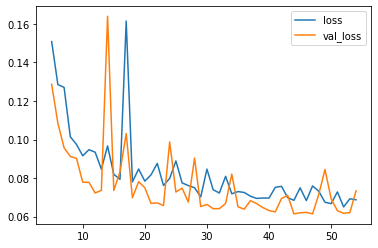

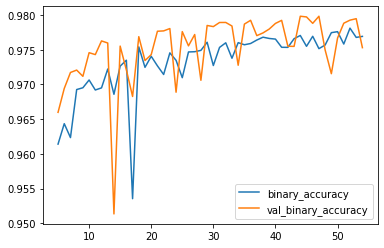

In [22]:
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

In [23]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.0614
Best Validation Accuracy: 0.9798


# using logistic regression with smote

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [25]:
log_reg.fit(X_sm_train, y_sm_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_sm_pred = log_reg.predict(X_sm_test)

In [26]:
from sklearn.metrics import classification_report

In [29]:
print("Classification report for logistic regresion \n")
print(classification_report(y_sm_test, y_sm_pred))

Classification report for logistic regresion 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.96      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



# Trying bunch of models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

classifiers = {"log_reg" : LogisticRegression(), "tree" : DecisionTreeClassifier(),
               "supportvector": SVC(), "neighbours" : KNeighborsClassifier()}

In [ ]:
for key, classifier in classifiers.items():
  classifier.fit(X_sm_train, y_sm_train)
  y_pred_key = classifier.predict(X_sm_test)
  print("Classification report for", key, "\n")
  print(classification_report(y_sm_test, y_pred_key))

Classification report for log_reg 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     71079
           1       0.98      0.96      0.97     71079

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158

Classification report for tree 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      1.00      1.00     71079

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158

